In [1]:
import seaborn as sns 
import pandas as pd
import wandb
from pandas_profiling import ProfileReport

For tracking this notebook:

In [2]:
run = wandb.init(project = 'exercise_4', 
                save_code = True)

wandb: Currently logged in as: jobquiroz (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.7 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Fetching the artifact (already in wandb):

In [3]:
artifact = run.use_artifact("exercise_4/genres_mod.parquet:latest")
df = pd.read_parquet(artifact.file())
df.head() #

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,None
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,None
2,0.850,0.893,5,NaN,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,None
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),None
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,None


Generate a profile and note the warnings:

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

profile.to_widgets()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Remove duplicates

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

Let's perform a minimal feature enginnering. Let's create a new feature by concatenating them, after replacing all missing values with the empty string:

In [6]:
df['title'].fillna(value='', inplace=True)
df['song_name'].fillna(value='', inplace=True)
df['text_feature'] = df['title'] + ' ' + df['song_name']

NOTE: this feature will have to go to the feature store. If you do not have a feature store, then you should not compute it here as part of the preprocessing step. Instead, you should compute it within the inference pipeline.

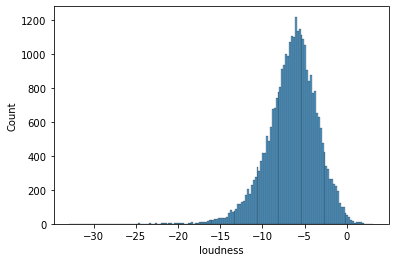

In [7]:
hist = sns.histplot( df['loudness'].dropna() )

wandb.log({"chart": wandb.Image(hist)})